# Exercise 13: Different linkage, different hierarchical clustering!

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using `'complete'` linkage. Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram with the one in the video.  Different linkage, different hierarchical clustering!

First, we need to do a little pre-processing to account for one of the Eurovision rules: countries are not allowed to vote for themselves.

**Step 1:** Load the DataFrame _(written for you)_

In [2]:
import pandas as pd

scores_df = pd.read_csv('../datasets/eurovision-2016-televoting.csv', index_col=0)
country_names = list(scores_df.index)

**Step 2:** Display the DataFrame, and have a look.  Each row represents a country that _voted_, while each column represents a country that _performed_.

Notice the NaN ("not-a-number") values.  These correspond to missing scores in the original CSV file.  These scores are missing because countries that performed were not allowed to vote for themselves.

In [3]:
scores_df.sample(10)

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0
Cyprus,8.0,5.0,0.0,0.0,0.0,12.0,0.0,NaN,0.0,6.0,...,3.0,0.0,2.0,10.0,0.0,0.0,1.0,0.0,7.0,0.0
Ireland,0.0,6.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,12.0,0.0,10.0,8.0,0.0,0.0,2.0,0.0,4.0,3.0
Slovenia,0.0,3.0,6.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,...,0.0,0.0,4.0,10.0,12.0,0.0,5.0,0.0,7.0,0.0
Bosnia & Herzegovina,0.0,3.0,5.0,8.0,0.0,2.0,10.0,0.0,0.0,4.0,...,0.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,7.0,0.0
Serbia,2.0,6.0,0.0,0.0,5.0,8.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,12.0,NaN,0.0,1.0,0.0,7.0,0.0
Russia,12.0,4.0,8.0,6.0,0.0,0.0,0.0,7.0,0.0,3.0,...,0.0,0.0,5.0,NaN,0.0,0.0,2.0,0.0,10.0,0.0
Malta,0.0,12.0,0.0,6.0,0.0,8.0,0.0,0.0,0.0,2.0,...,0.0,NaN,0.0,10.0,0.0,0.0,0.0,3.0,4.0,1.0
San Marino,2.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,8.0,0.0,7.0,10.0,0.0,0.0,4.0,0.0,12.0,0.0


In [ ]:
df

**Step 3:** Fill in the NaNs with the highest possible score (12) - we are assuming that countries would vote for themselves, if they had been allowed to do so.  _(This bit written for you)._

In [4]:
new_scores_df = scores_df.fillna(12)

**Step 4:** Import the `normalize` function from `sklearn.preprocessing`.

In [5]:
from sklearn.preprocessing import normalize

In [6]:
new_scores_df.head(5)

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,12.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,12.0,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,12.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,12.0,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


**Step 5:** Apply the normalize function to `scores_df.values`, assigning the result to `samples`.

(Why do we need to normalize?  Because now that the missing values are filled with 12 points, some countries (those that performed) given a greater total number of points when voting.  The `normalize` function corrects for this.) 

In [7]:
samples = normalize(new_scores_df)

In [8]:
samples

array([[0.09449112, 0.56694671, 0.        , ..., 0.        , 0.28347335,
        0.        ],
       [0.49319696, 0.        , 0.16439899, ..., 0.        , 0.41099747,
        0.        ],
       [0.        , 0.49319696, 0.12329924, ..., 0.        , 0.32879797,
        0.16439899],
       ...,
       [0.32879797, 0.20549873, 0.24659848, ..., 0.49319696, 0.28769823,
        0.        ],
       [0.28769823, 0.16439899, 0.        , ..., 0.        , 0.49319696,
        0.        ],
       [0.        , 0.24659848, 0.        , ..., 0.        , 0.20549873,
        0.49319696]])

**Step 6:** Import:
 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

**Step 7:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='single'` keyword argument. Assign the result to `mergings`.

In [12]:
mergings = linkage(samples,method='single')
mergings

array([[10.        , 19.        ,  0.26432965,  2.        ],
       [ 9.        , 35.        ,  0.28551856,  2.        ],
       [25.        , 26.        ,  0.34386515,  2.        ],
       [ 5.        , 40.        ,  0.36863356,  2.        ],
       [22.        , 30.        ,  0.37796447,  2.        ],
       [ 6.        , 39.        ,  0.38114337,  2.        ],
       [33.        , 44.        ,  0.4086064 ,  3.        ],
       [13.        , 48.        ,  0.41333129,  4.        ],
       [12.        , 21.        ,  0.44320263,  2.        ],
       [15.        , 31.        ,  0.44500301,  2.        ],
       [17.        , 45.        ,  0.46134351,  3.        ],
       [ 8.        , 42.        ,  0.4663105 ,  3.        ],
       [37.        , 51.        ,  0.4745657 ,  3.        ],
       [50.        , 54.        ,  0.4745657 ,  5.        ],
       [20.        , 55.        ,  0.47930129,  6.        ],
       [41.        , 46.        ,  0.48267974,  3.        ],
       [ 7.        , 29.

**Step 8:** Plot a dendrogram of the hierarchical clustering, using the list `country_names` as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=6` keyword arguments as you have done earlier.

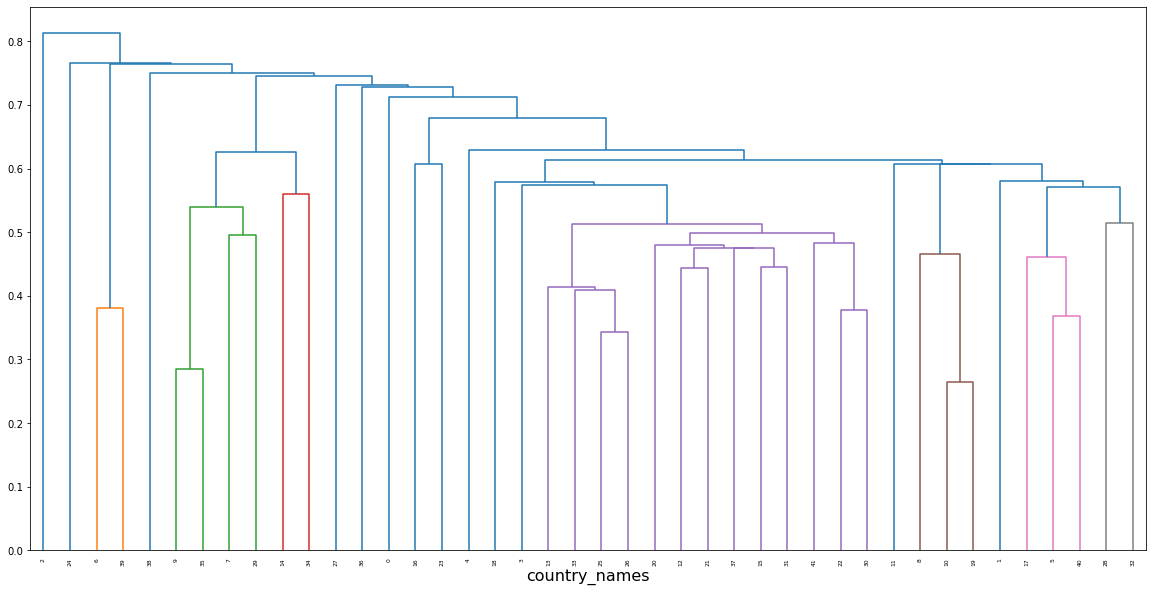

In [23]:
import matplotlib.pyplot as plt
chart = plt.figure(figsize=(20,10))

plt.xlabel('country_names', fontsize=16)
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)

plt.show()

**Step 9:** Compare your dendrogram above to the one in the slides and notice that different linkage functions give different hierarchical clusterings.

Both the linkage functions we've considered, "complete" and "single", have advantages and disadvantages.  In practice, just try both out, and see which dendrogram seems more sensible.